In [30]:
#importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Setting up Generator instance for train , validation and test

In [31]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [32]:
!ls "/content/drive/My Drive/dataset"

cat  kanye_west  pikachu


In [33]:
import os
train_dir = "/content/drive/My Drive/dataset"
test_dir = "/content/drive/My Drive/temp"

In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1840 files belonging to 3 classes.
Using 1472 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1840 files belonging to 3 classes.
Using 368 files for validation.


In [37]:
batch_size = 300
img_height = 180
img_width = 180

In [38]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3455 files belonging to 3 classes.
Using 691 files for validation.


In [39]:
!ls

drive  sample_data


In [87]:
class_names = train_ds.class_names
#class_names = class_names[:]
print(class_names)

['cat', 'kanye_west', 'pikachu']


# Develop and Train model 

In [41]:
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

In [42]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [43]:
base_model.trainable = False

In [44]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
prediction_layer = tf.keras.layers.Dense(3,activation = 'softmax')

In [45]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [46]:
height = 180
width = 180
resize = tf.keras.layers.experimental.preprocessing.Resizing(
    height, width, interpolation='bilinear', name=None)

In [47]:
inputs = tf.keras.Input(shape=(180, 180, 3))

x = resize(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
x = global_average_layer(x)

outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

In [18]:
#final model with frozen weights from mobile net v2
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
resizing (Resizing)          (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 180, 180, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843  

In [48]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3


In [31]:
model.save("/content/drive/My Drive/alex.h5")

In [49]:
model.load_weights("/content/drive/My Drive/alex.h5")

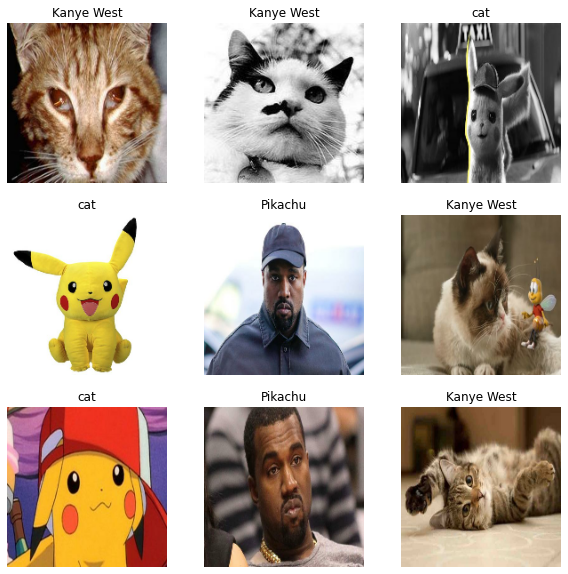

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

This image most likely belongs to kanye_west with a 57.60 percent confidence.


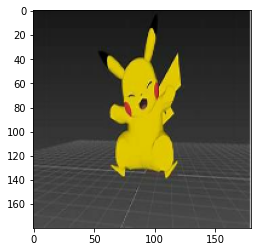

In [91]:
test_class_names = test_ds.class_names
scores  = []
ylabel = []
ypred = []
for images, labels in test_ds.take(1):
  predictions = model.predict(images)
  scores = tf.nn.softmax(predictions)
  #print(labels)
  ylabel = labels
  #print(labels)
  #ylabel.append(class_names[labels])

for images, labels in test_ds.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))
  prediction = model.predict(images)
  scor = tf.nn.softmax(prediction[0])
  
  #plt.imshow(images[0]*255)

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_class_names[np.argmax(scor)], 100 * np.max(scor))
)

In [80]:
# Return double of n 
def addition(n): 
    return class_names[np.argmax(n)]

result = map(addition, scores) 
ypred = list(result)


In [81]:
test_class_names  = list
#test_class_names = test_ds.class_names
test_class_names = ['pikachu', 'cat', 'kanye_west']
print(type(list(test_class_names)))

<class 'list'>


In [82]:
# Return double of n 
def addition(n): 
    return test_class_names[n]
  
# We double all numbers using map() 

results = map(addition, ylabel) 
ylabel = list(results)

# evaluation

In [83]:
confusion_matrix(ylabel, ypred, labels=['cat', 'kanye_west', 'pikachu'])

array([[ 99,   1,   0],
       [  0, 102,   1],
       [  0,   0,  97]])

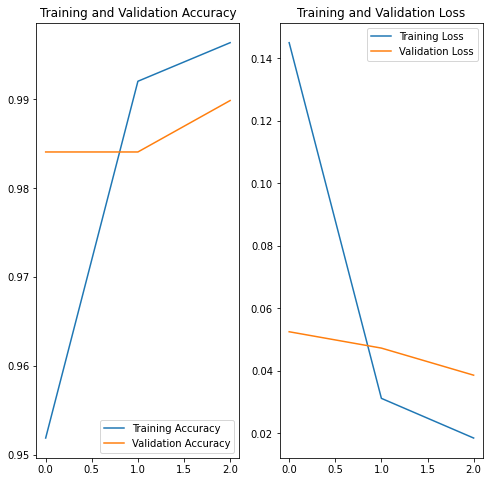

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()